<a href="https://colab.research.google.com/github/MoutazMohamed0/Data-110/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset that I'm analyzing is from Basketball Reference, a subsidiary of Sports Reference, a sports statistics and analytics company that creates and maintains databases of several amateur and professional sports leagues. Sports Reference maintains databases of the big four sports leagues, the NBA (Basketball Reference), the NFL (Football Reference), the NHL (Hockey Reference), and the MLB (Baseball Reference) as well as various college sports. Sports Reference's creation along with the use of statistics in professional sports (while not new) has seen a major increase in the last decade, and given rise to the field of sports analytics. Sports analytics is a marriage of both statistical analysis and sports in a way which allows teams to obtain insight into how to improve their roster or adjust their team's shot diet (the amount and type of shots a specific player or team takes). My goal with this project is to obtain insight into what type of shots are being taken by specific players and position groups, evaluate the frequency and efficiency of their shots, and analyze player's offensive and defensive impact on games while applying the data visualization techniques that we learned in class. This dataset contains 30 variables, age (a player's age during the 2023 season), Team (the team that the player played for), Pos (position the player plays), G (number of games played), GS (number of games started), MP (minutes played per game), FG (number of field goals scored), FGA (total number of field goals taken), FG% (FG/FGA), 3P (number of field goals behind the 3 point line scored), 3PA (total number of field goals attempted behind the 3 point line), 3P% (3P/3PA), 2P (number of field goals not behind the 3 point line scored), 2PA (number of field goals attempted not behind the 3 point line), 2P% (2P/2PA), eFG% (effective field goal percentage, a measure of efficiency that adjusts FG% for the value of 3 point shots), FT (number of free throws (foul shots) scored), FTA (number of free throws (foul shots) attempted), FT% (FT/FTA), ORB (rebounds obtained after a teammate attempts a shot per game), DRB (rebounds obtained after an opponent attempts a shot per game), TRB (ORB+DRB), AST (assists per game), STL (steals per game), BLK (blocks per game), TOV (turnovers per game), PF (personal fouls per game), PTS (points per game) Ortg (Offensive Rating (a higher number means your are more efficient offensively)), DRtg (Defensive Rating (a lower number means your are more efficient defensively)). For this project I will focus mainly on the measures of shots taken (2P, 3P, FT, etc.), per game stats (PTS, AST, TRB, BLK, STL), and Offensive Rating and Defensive Rating.

In [2]:
!pip install rpy2
!pip install joypy

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joypy import joyplot

In [4]:
nba=pd.read_csv("https://raw.githubusercontent.com/MoutazMohamed0/Data-110/refs/heads/main/Project%201/nba-player-stats-2023.csv")

In [4]:
print(nba.head())

                    Player  Age Team Pos   G  GS    MP    FG   FGA    FG%  \
0              Joel Embiid   29  PHI   C  39  39  33.6  11.5  21.8  0.529   
1              Luka Don?i?   24  DAL  PG  70  70  37.5  11.5  23.6  0.487   
2    Giannis Antetokounmpo   29  MIL  PF  73  73  35.2  11.5  18.8  0.611   
3  Shai Gilgeous-Alexander   25  OKC  PG  75  75  34.0  10.6  19.8  0.535   
4            Jalen Brunson   27  NYK  PG  77  77  35.4  10.3  21.4  0.479   

   ...  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Ortg  DRtg  
0  ...  8.6  11.0  5.6  1.2  1.7  3.8  2.9  34.7   124   109  
1  ...  8.4   9.2  9.8  1.4  0.5  4.0  2.1  33.9   122   113  
2  ...  8.8  11.5  6.5  1.2  1.1  3.4  2.9  30.4   126   112  
3  ...  4.7   5.5  6.2  2.0  0.9  2.2  2.5  30.1   129   110  
4  ...  3.1   3.6  6.7  0.9  0.2  2.4  1.9  28.7   124   117  

[5 rows x 31 columns]


In [5]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  735 non-null    object 
 1   Age     735 non-null    int64  
 2   Team    735 non-null    object 
 3   Pos     735 non-null    object 
 4   G       735 non-null    int64  
 5   GS      735 non-null    int64  
 6   MP      735 non-null    float64
 7   FG      735 non-null    float64
 8   FGA     735 non-null    float64
 9   FG%     727 non-null    float64
 10  3P      735 non-null    float64
 11  3PA     735 non-null    float64
 12  3P%     689 non-null    float64
 13  2P      735 non-null    float64
 14  2PA     735 non-null    float64
 15  2P%     722 non-null    float64
 16  eFG%    727 non-null    float64
 17  FT      735 non-null    float64
 18  FTA     735 non-null    float64
 19  FT%     676 non-null    float64
 20  ORB     735 non-null    float64
 21  DRB     735 non-null    float64
 22  TR

In [6]:
nba.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Ortg,DRtg
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,727.000000,735.000000,735.000000,689.000000,...,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,26.155102,40.880272,18.440816,18.264762,2.972789,6.423401,0.447558,0.909116,2.582449,0.316925,...,2.423265,3.239184,1.934150,0.587347,0.383946,0.943946,1.456735,8.022313,111.440816,115.813605
std,4.371745,25.581293,25.024108,9.735524,2.356999,4.783384,0.110701,0.848969,2.166629,0.137217,...,1.741203,2.320766,1.800255,0.393774,0.400733,0.758414,0.784284,6.481825,19.067826,4.162153
min,19.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.000000
25%,23.000000,17.000000,0.000000,10.600000,1.300000,3.000000,0.400000,0.200000,0.900000,0.280000,...,1.100000,1.600000,0.700000,0.300000,0.100000,0.400000,0.900000,3.400000,105.000000,113.000000
50%,25.000000,41.000000,5.000000,17.200000,2.300000,5.000000,0.446000,0.700000,2.100000,0.346000,...,2.100000,2.800000,1.300000,0.500000,0.300000,0.700000,1.400000,6.100000,113.000000,116.000000
75%,29.000000,64.500000,29.000000,26.450000,4.150000,8.700000,0.500000,1.400000,3.700000,0.385000,...,3.350000,4.300000,2.600000,0.800000,0.500000,1.300000,2.000000,11.050000,121.000000,119.000000
max,39.000000,84.000000,82.000000,37.800000,11.500000,23.600000,0.800000,4.800000,11.800000,1.000000,...,10.100000,13.700000,10.900000,2.100000,3.600000,4.400000,3.600000,34.700000,227.000000,127.000000


In [5]:
nbap = nba[(nba['MP']>=10)]

In [6]:
nbaclean = nba[(nba['G']>=50) & (nba['MP']>=10)]

In [7]:
nbaod = nba[(nba['G']>=50) & (nba['MP']>=30)]

In [8]:
nbacount= nbap['Pos'].value_counts()

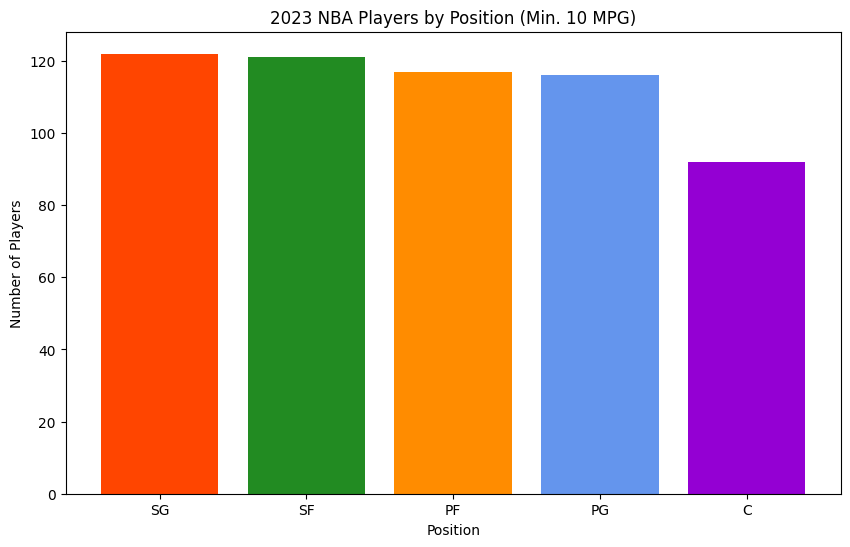

In [11]:
x = ['Pos']
y = nbacount
plt.figure(figsize=(10, 6))
colors = ['orangered', 'forestgreen', 'darkorange', 'cornflowerblue', 'darkviolet']
plt.bar(nbacount.index, nbacount.values, color=colors)
plt.title = plt.gca().set_title
plt.title('2023 NBA Players by Position (Min. 10 MPG)')
plt.xlabel("Position")
plt.ylabel("Number of Players")

plt.show()

In [12]:
TotalPlayers = nbap['Pos'].value_counts()
print(TotalPlayers)

Pos
SG    122
SF    121
PF    117
PG    116
C      92
Name: count, dtype: int64


This graph illustrates the number of players at each position who played a minimum of 10 minutes per game. There were 122 shooting guards, 121 small forwards, 117 power forwards, 116 point guards, and 92 centers that played at least 10 minutes per game in the 2023 season. This graph gives me insight into the positional breakdown of the players who played significant minutes.

In [9]:
Top5_Points = nbaclean[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)
print(Top5_Points)

                    Player   PTS
1              Luka Don?i?  33.9
2    Giannis Antetokounmpo  30.4
3  Shai Gilgeous-Alexander  30.1
4            Jalen Brunson  28.7
6             Kevin Durant  27.1


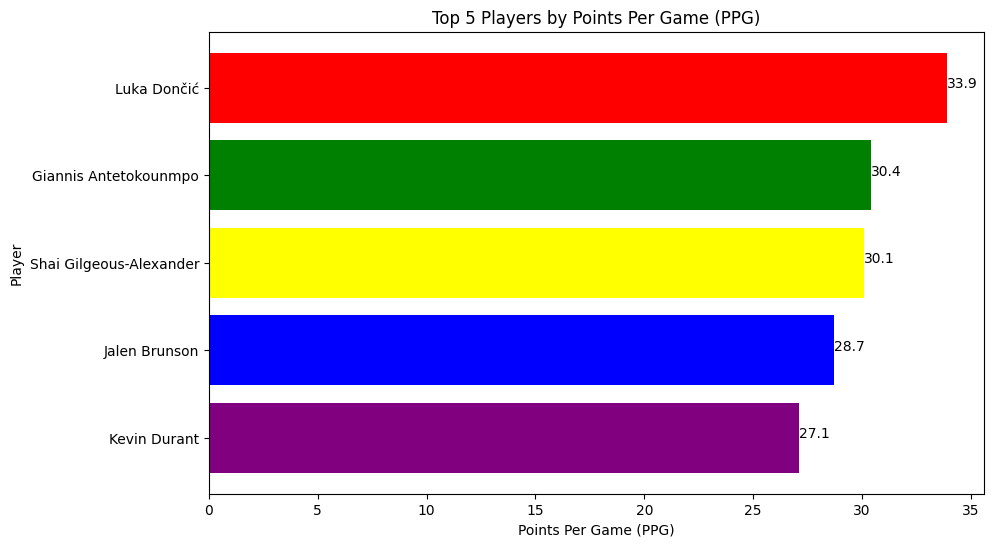

In [45]:
plt.figure(figsize=(10, 6))
x = ['Luka Dončić', 'Giannis Antetokounmpo', 'Shai Gilgeous-Alexander', 'Jalen Brunson', 'Kevin Durant']
y = [33.9, 30.4, 30.1, 28.7, 27.1]
colors = ['red', 'green', 'yellow', 'blue', 'purple']
plt.barh(x, y, color=colors)
plt.text(33.9, 'Luka Dončić', '33.9')
plt.text(30.4, 'Giannis Antetokounmpo', '30.4')
plt.text(30.1, 'Shai Gilgeous-Alexander', '30.1')
plt.text(28.7, 'Jalen Brunson', '28.7')
plt.text(27.1, 'Kevin Durant', '27.1')
plt.gca().invert_yaxis()
plt.title = plt.gca().set_title
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Player')
plt.title('Top 5 Players by Points Per Game (PPG)')
plt.show()

In [14]:
Top5_Rebounds = nbaclean[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(5)
print(Top5_Rebounds)

               Player   TRB
63   Domantas Sabonis  13.7
119       Rudy Gobert  12.9
18      Anthony Davis  12.6
11       Nikola Joki?  12.4
124       Jalen Duren  11.6


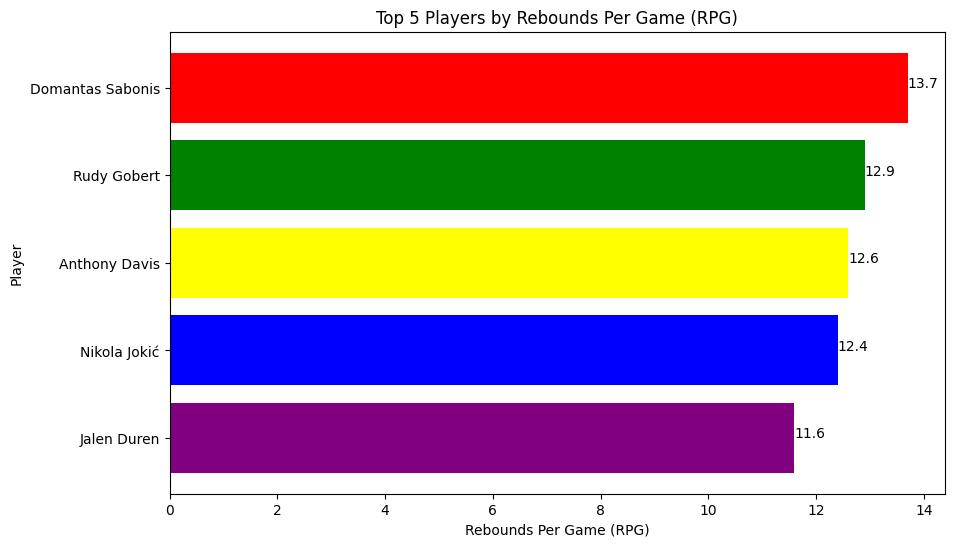

In [46]:
plt.figure(figsize=(10, 6))
x = ['Domantas Sabonis', 'Rudy Gobert', 'Anthony Davis', 'Nikola Jokić', 'Jalen Duren']
y = [13.7, 12.9, 12.6, 12.4, 11.6]
colors = ['red', 'green', 'yellow', 'blue', 'purple']
plt.barh(x, y, color=colors)
plt.text(13.7, 'Domantas Sabonis', '13.7')
plt.text(12.9, 'Rudy Gobert', '12.9')
plt.text(12.6, 'Anthony Davis', '12.6')
plt.text(12.4, 'Nikola Jokić', '12.4')
plt.text(11.6, 'Jalen Duren', '11.6')
plt.gca().invert_yaxis()
plt.title = plt.gca().set_title
plt.xlabel('Rebounds Per Game (RPG)')
plt.ylabel('Player')
plt.title('Top 5 Players by Rebounds Per Game (RPG)')
plt.show()

In [15]:
Top5_Assists = nbaclean[['Player', 'AST']].sort_values(by='AST', ascending=False).head(5)
print(Top5_Assists)

               Player   AST
51  Tyrese Haliburton  10.9
15         Trae Young  10.8
1         Luka Don?i?   9.8
11       Nikola Joki?   9.0
85       James Harden   8.5


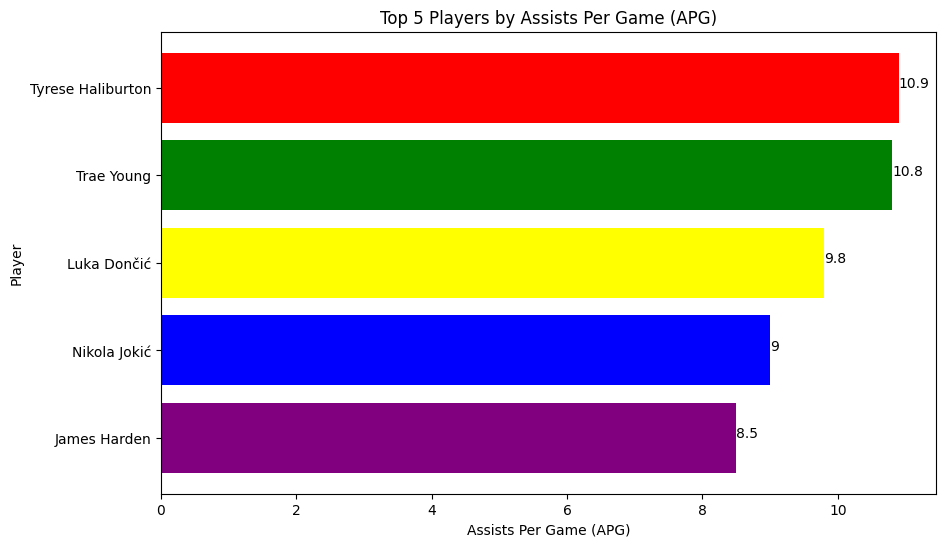

In [47]:
plt.figure(figsize=(10, 6))
x = ['Tyrese Haliburton', 'Trae Young', 'Luka Dončić', 'Nikola Jokić', 'James Harden']
y = [10.9, 10.8, 9.8, 9, 8.5]
colors = ['red', 'green', 'yellow', 'blue', 'purple']
plt.barh(x, y, color=colors)
plt.text(10.9, 'Tyrese Haliburton', '10.9')
plt.text(10.8, 'Trae Young', '10.8')
plt.text(9.8, 'Luka Dončić', '9.8')
plt.text(9, 'Nikola Jokić', '9')
plt.text(8.5, 'James Harden', '8.5')
plt.gca().invert_yaxis()
plt.title = plt.gca().set_title
plt.xlabel('Assists Per Game (APG)')
plt.ylabel('Player')
plt.title('Top 5 Players by Assists Per Game (APG)')
plt.show()

In [16]:
Top5_Steals = nbaclean[['Player', 'STL']].sort_values(by='STL', ascending=False).head(5)
print(Top5_Steals)

                      Player  STL
8               De'Aaron Fox  2.0
3    Shai Gilgeous-Alexander  2.0
9           Donovan Mitchell  1.8
212              Alex Caruso  1.7
411         Matisse Thybulle  1.7


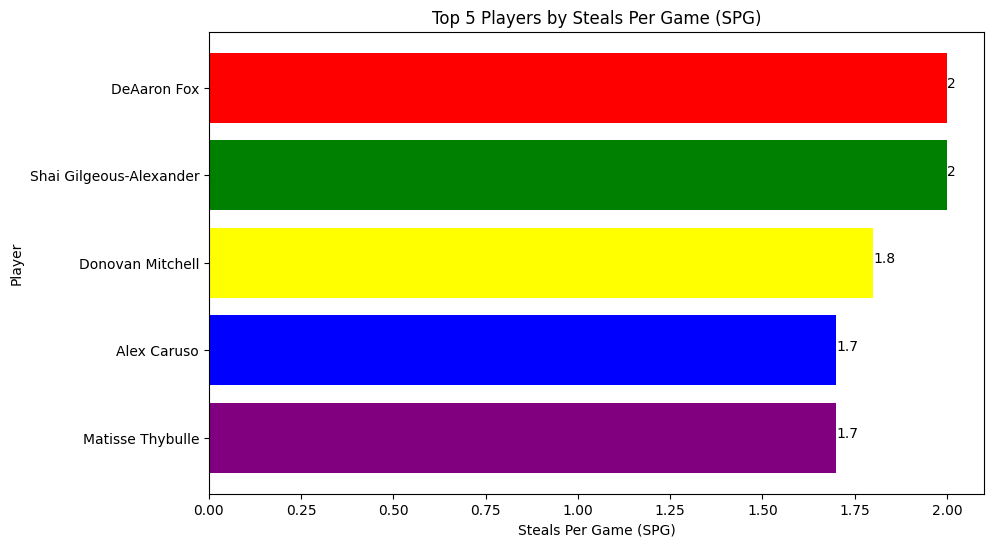

In [48]:
plt.figure(figsize=(10, 6))
x = ['DeAaron Fox', 'Shai Gilgeous-Alexander', 'Donovan Mitchell', 'Alex Caruso', 'Matisse Thybulle']
y = [2, 2, 1.8, 1.7, 1.7]
colors = ['red', 'green', 'yellow', 'blue', 'purple']
plt.barh(x, y, color=colors)
plt.text(2, 'DeAaron Fox', '2')
plt.text(2, 'Shai Gilgeous-Alexander', '2')
plt.text(1.8, 'Donovan Mitchell', '1.8')
plt.text(1.7, 'Alex Caruso', '1.7')
plt.text(1.7, 'Matisse Thybulle', '1.7')
plt.gca().invert_yaxis()
plt.title = plt.gca().set_title
plt.xlabel('Steals Per Game (SPG)')
plt.ylabel('Player')
plt.title('Top 5 Players by Steals Per Game (SPG)')
plt.show()

In [17]:
Top5_Blocks = nbaclean[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(5)
print(Top5_Blocks)

                Player  BLK
40   Victor Wembanyama  3.6
265     Walker Kessler  2.4
145        Brook Lopez  2.4
87       Chet Holmgren  2.3
18       Anthony Davis  2.3


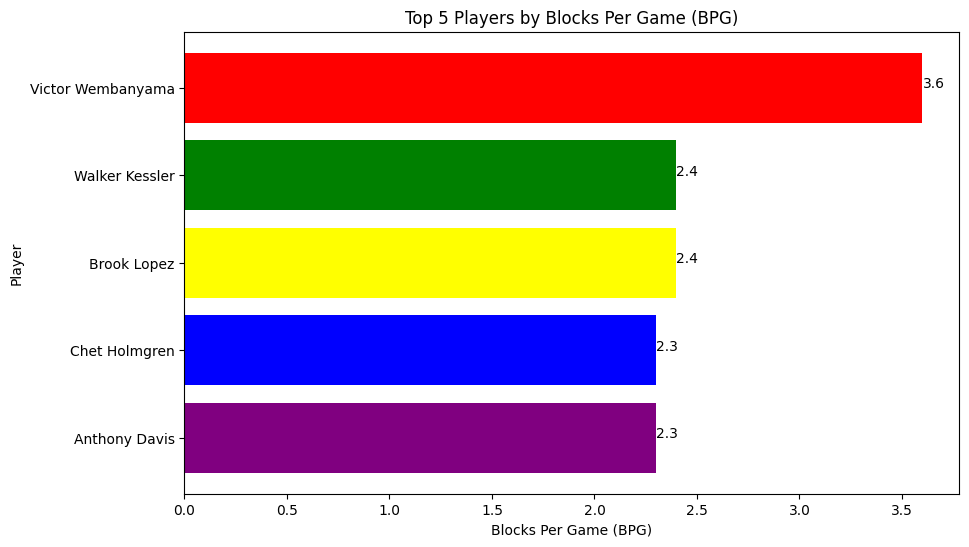

In [49]:
plt.figure(figsize=(10, 6))
x = ['Victor Wembanyama', 'Walker Kessler', 'Brook Lopez', 'Chet Holmgren', 'Anthony Davis']
y = [3.6, 2.4, 2.4, 2.3, 2.3]
colors = ['red', 'green', 'yellow', 'blue', 'purple']
plt.barh(x, y, color=colors)
plt.text(3.6, 'Victor Wembanyama', '3.6')
plt.text(2.4, 'Walker Kessler', '2.4')
plt.text(2.4, 'Brook Lopez', '2.4')
plt.text(2.3, 'Chet Holmgren', '2.3')
plt.text(2.3, 'Anthony Davis', '2.3')
plt.gca().invert_yaxis()
plt.title = plt.gca().set_title
plt.xlabel('Blocks Per Game (BPG)')
plt.ylabel('Player')
plt.title('Top 5 Players by Blocks Per Game (BPG)')
plt.show()

These graphs and statistics give me insight into who leads the NBA in each per game statistical category.

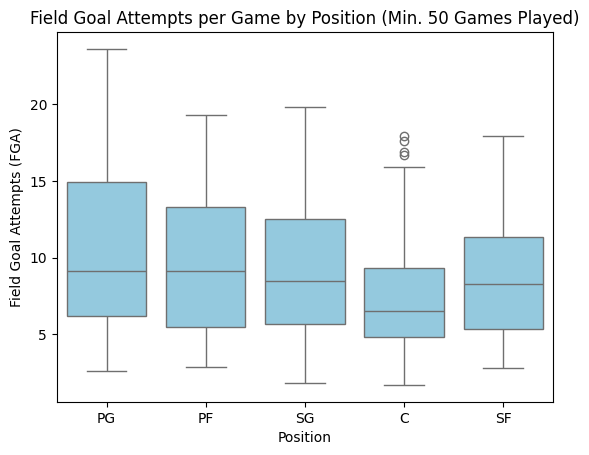

In [8]:
sns.boxplot(x='Pos', y='FGA', data=nbaclean,color="skyblue")
plt.title = plt.gca().set_title
plt.title('Field Goal Attempts per Game by Position (Min. 50 Games Played)')
plt.xlabel('Position')
plt.ylabel('Field Goal Attempts (FGA)')
plt.show()

This graph illustrates the number of field goals attempted broken down by positional group (PG, SG, SF, PF, and C) by players with a minimum of 50 games played. We can see that while centers take less field goal attempts on average, there are outliers that take a similar number of field goals to high volume players of other positional groups.

In [9]:
PAT3 = nbaclean['3PA'].sum()
PAT2 = nbaclean['2PA'].sum()
FTAT = nbaclean['FTA'].sum()

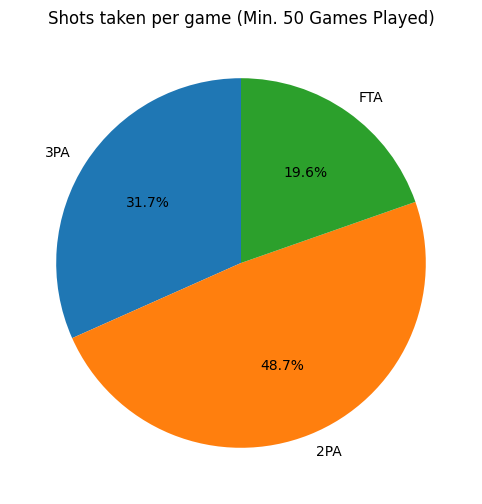

In [10]:
labels = ['3PA', '2PA', 'FTA']
Attempts = [PAT3, PAT2, FTAT]
plt.figure(figsize=(10, 6))
plt.pie(Attempts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title = plt.gca().set_title
plt.title('Shots taken per game (Min. 50 Games Played)')
plt.show()

This graph illustrates the shot diet as a percentage by players of all positions with a minimum of 50 games played. We can see players take 3 point attempts 31.7% of the time, 2 point attempts 48.7% of the time, and free throws 19.6% of the time.

In [11]:
AttemptsByPosition = nbaclean.groupby('Pos')[['3PA', '2PA', 'FTA']].sum()

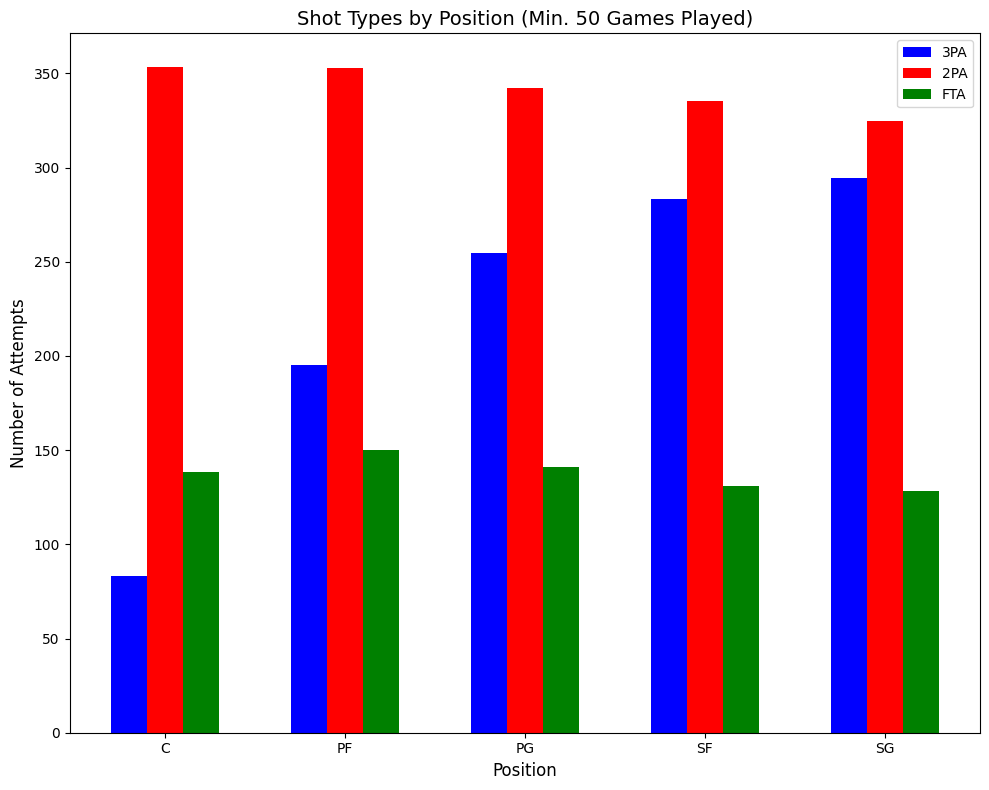

In [31]:
bar_width = 0.2
index = np.arange(len(AttemptsByPosition))

plt.figure(figsize=(10, 8))

plt.bar(index - bar_width, AttemptsByPosition['3PA'], bar_width, label='3PA', color='blue')
plt.bar(index, AttemptsByPosition['2PA'], bar_width, label='2PA', color='red')
plt.bar(index + bar_width, AttemptsByPosition['FTA'], bar_width, label='FTA', color='green')

plt.xlabel('Position', fontsize=12)
plt.ylabel('Number of Attempts', fontsize=12)
plt.title = plt.gca().set_title
plt.title('Shot Types by Position (Min. 50 Games Played)', fontsize=14)
plt.xticks(index, AttemptsByPosition.index)


plt.legend()

plt.tight_layout()
plt.show()

This graph illustrates the difference in shot diet (total attempts) between point guards, shooting guards, small forwards, power forwards, and centers. We can see that generally centers and power forwards take less 3 point shots, more 2 point shots, and more free throws than point guards, shooting guards, and small forwards.

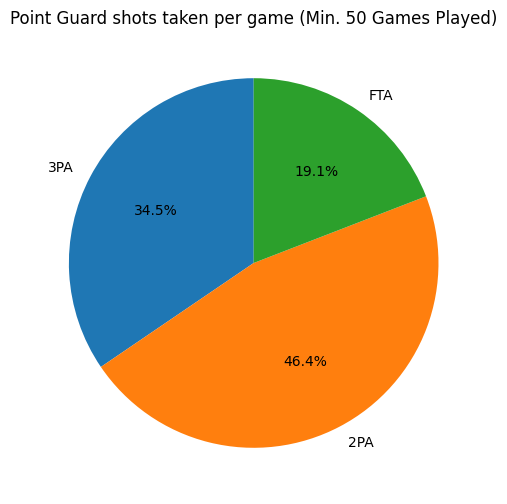

In [26]:
labels = ['3PA', '2PA', 'FTA']
Attempts = [AttemptsByPosition.loc['PG', '3PA'], AttemptsByPosition.loc['PG', '2PA'], AttemptsByPosition.loc['PG', 'FTA']]
plt.figure(figsize=(10, 6))
plt.pie(Attempts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title = plt.gca().set_title
plt.title('Point Guard shots taken per game (Min. 50 Games Played)')
plt.show()

This graph illustrates the shot diet as a percentage by Point Guards with a minimum of 50 games played. We can see Point Guards take 3 point attempts 34.5% of the time (higher when compared to all players), 2 point attempts 46.4% of the time (lower when compared to all players), and free throws 19.1% of the time (lower when compared to all players).

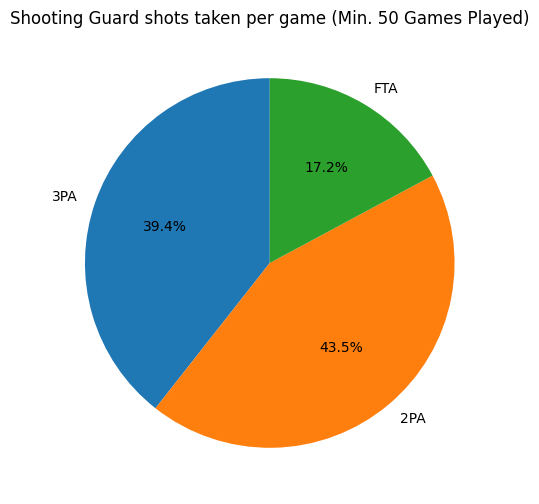

In [27]:
labels = ['3PA', '2PA', 'FTA']
Attempts = [AttemptsByPosition.loc['SG', '3PA'], AttemptsByPosition.loc['SG', '2PA'], AttemptsByPosition.loc['SG', 'FTA']]
plt.figure(figsize=(10, 6))
plt.pie(Attempts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title = plt.gca().set_title
plt.title('Shooting Guard shots taken per game (Min. 50 Games Played)')
plt.show()

This graph illustrates the shot diet as a percentage by Shooting Guards with a minimum of 50 games played. We can see Shooting Guards take 3 point attempts 39.4% of the time (higher when compared to all players), 2 point attempts 43.5% of the time (lower when compared to all players), and free throws 17.2% of the time (lower when compared to all players).

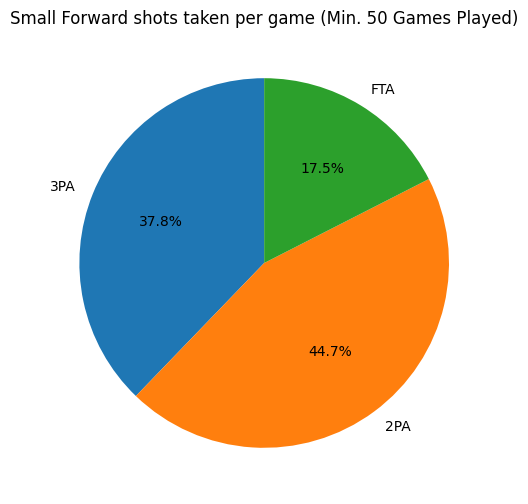

In [28]:
labels = ['3PA', '2PA', 'FTA']
Attempts = [AttemptsByPosition.loc['SF', '3PA'], AttemptsByPosition.loc['SF', '2PA'], AttemptsByPosition.loc['SF', 'FTA']]
plt.figure(figsize=(10, 6))
plt.pie(Attempts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title = plt.gca().set_title
plt.title('Small Forward shots taken per game (Min. 50 Games Played)')
plt.show()

This graph illustrates the shot diet as a percentage by Small Forwards with a minimum of 50 games played. We can see Small Forwards take 3 point attempts 37.8% of the time (higher when compared to all players), 2 point attempts 44.7% of the time (lower when compared to all players), and free throws 17.5% of the time (lower when compared to all players).

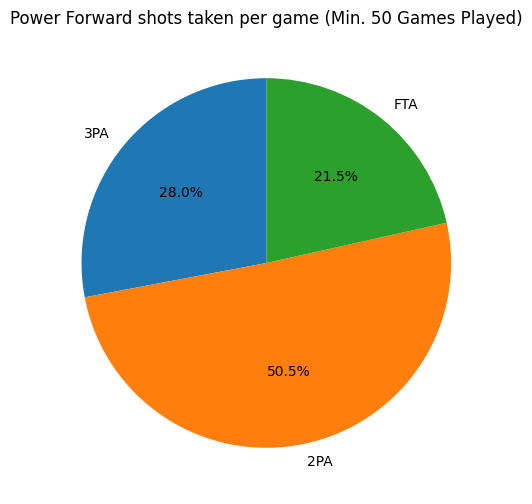

In [29]:
labels = ['3PA', '2PA', 'FTA']
Attempts = [AttemptsByPosition.loc['PF', '3PA'], AttemptsByPosition.loc['PF', '2PA'], AttemptsByPosition.loc['PF', 'FTA']]
plt.figure(figsize=(10, 6))
plt.pie(Attempts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title = plt.gca().set_title
plt.title('Power Forward shots taken per game (Min. 50 Games Played)')
plt.show()

This graph illustrates the shot diet as a percentage by Power Forwards with a minimum of 50 games played. We can see Power Forwards take 3 point attempts 28% of the time (lower when compared to all players), 2 point attempts 50.5% of the time (higher when compared to all players), and free throws 21.5% of the time (higher when compared to all players).

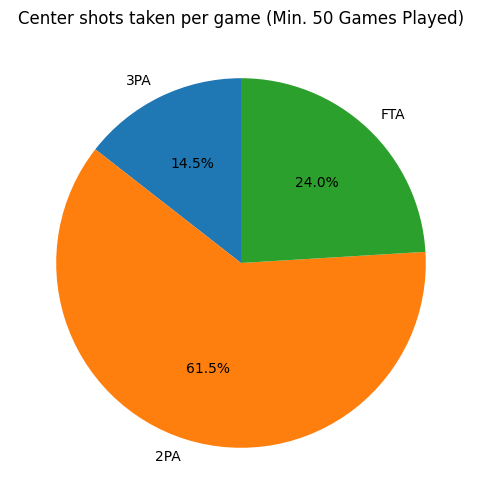

In [30]:
labels = ['3PA', '2PA', 'FTA']
Attempts = [AttemptsByPosition.loc['C', '3PA'], AttemptsByPosition.loc['C', '2PA'], AttemptsByPosition.loc['C', 'FTA']]
plt.figure(figsize=(10, 6))
plt.pie(Attempts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title = plt.gca().set_title
plt.title('Center shots taken per game (Min. 50 Games Played)')
plt.show()

This graph illustrates the shot diet as a percentage by Centers with a minimum of 50 games played. We can see Centers take 3 point attempts 14.5% of the time (lower when compared to all players), 2 point attempts 61.5% of the time (higher when compared to all players), and free throws 24% of the time (higher when compared to all players).

In [31]:
nbacleanFT = nba[(nba['G']>=50) & (nba['MP']>=10) & (nba['FTA']>=3)]

In [32]:
Top5_FT_percent = nbacleanFT[['Player', 'FT%']].sort_values(by='FT%', ascending=False).head(5)
print(Top5_FT_percent)

             Player    FT%
10    Stephen Curry  0.923
19   Damian Lillard  0.920
30      Paul George  0.907
16     Kyrie Irving  0.905
25  Lauri Markkanen  0.899


In [33]:
Bottom5_FT_percent = nbacleanFT[['Player', 'FT%']].sort_values(by='FT%', ascending=True).head(5)
print(Bottom5_FT_percent)

                    Player    FT%
119            Rudy Gobert  0.638
182           Jusuf Nurki?  0.640
2    Giannis Antetokounmpo  0.657
122           Aaron Gordon  0.658
42          Alperen ?engün  0.693


In [34]:
nbaclean3P = nba[(nba['G']>=50) & (nba['MP']>=10) & (nba['3PA']>=3)]

In [36]:
Top5_3P_percent = nbaclean3P[['Player', '3P%']].sort_values(by='3P%', ascending=False).head(5)
print(Top5_3P_percent)

            Player    3P%
130  Grayson Allen  0.461
167    Mike Conley  0.442
123  Norman Powell  0.435
68    Bradley Beal  0.430
144   Jrue Holiday  0.429


In [35]:
Bottom5_3P_percent = nbaclean3P[['Player', '3P%']].sort_values(by='3P%', ascending=True).head(5)
print(Bottom5_3P_percent)

              Player    3P%
373      Kris Murray  0.268
58      Franz Wagner  0.281
77   Jordan Clarkson  0.294
71    Nikola Vu?evi?  0.294
200    Dalano Banton  0.296


In [37]:
nbaclean2P = nba[(nba['G']>=50) & (nba['MP']>=10) & (nba['2PA']>=5)]

In [39]:
Top5_2P_percent = nbaclean2P[['Player', '2P%']].sort_values(by='2P%', ascending=False).head(5)
print(Top5_2P_percent)

               Player    2P%
245  Dereck Lively II  0.752
174    Daniel Gafford  0.725
227     Nick Richards  0.693
265    Walker Kessler  0.680
210    Onyeka Okongwu  0.676


In [38]:
Bottom5_2P_percent = nbaclean2P[['Player', '2P%']].sort_values(by='2P%', ascending=True).head(5)
print(Bottom5_2P_percent)

                  Player    2P%
120      Scoot Henderson  0.416
213  Talen Horton-Tucker  0.438
74         Fred VanVleet  0.454
135       Keyonte George  0.459
128       Gary Trent Jr.  0.464


These statistics give me insight into who leads and trails the NBA in free throw, 3 point, and 2 point shot efficiency. We can see that
point guards generally lead in free throw percentage, 3 point percentage, and trail in 2 point percentage. While centers generally lead in 2 point percentage and trail in free throw percentage.

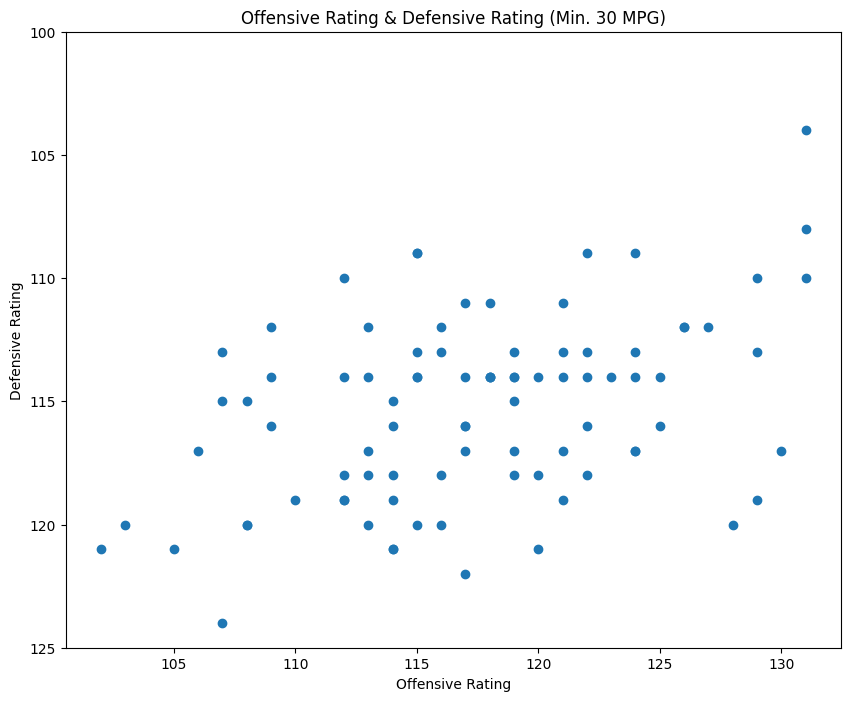

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(nbaod['Ortg'],nbaod['DRtg'])
plt.gca().invert_yaxis()
plt.yticks([125, 120, 115, 110, 105, 100])
plt.title = plt.gca().set_title
plt.title("Offensive Rating & Defensive Rating (Min. 30 MPG)")
plt.xlabel('Offensive Rating')
plt.ylabel('Defensive Rating')
plt.show()

This graph illustrates the the offensive and defensive ratings by players with a minimum of 30 minutes per game and 50 games played. This illustrates a player's offensive and defensive impact on games. The player with the most impact of the game both offensively and defensively with an offensive rating of 131 and a defensive rating of 104 is Rudy Gobert a center.

In conclusion, the findings in this analysis reveal the differences in shot frequency (shot diet) between different positions. We can conclude that the PG, SG, and SF positions shoot more 3 point shots than the PF and C positions who, while also generally taking less shots overall, take more 2 point and free throw attempts on average when they do score. The analysis also reveals that the most impactful player on offense and defense is a center (Rudy Gobert). In the future access to a more detailed and robust dataset would offer the possibility to explore how both shot frequency and efficiency change each quarter, the impacts of age on shot diet and efficiency, the change in the NBA's overall shot diet over the last decade, the shot diet and efficiency of most successful teams, and the changes in shot diet and strategy in the playoffs.